**Library imports**

In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import ast

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing utilities
from itertools import combinations
from difflib import SequenceMatcher
import datetime

# 1. Data Importing

In this part, we will display all the 5 different data bases at disposal. Some features will also be simplified into more efficient structures. Eventually, all the data will be merged into one coherent non-repetitive dataframe.

In [3]:
# Definition of common data pathway
DATA_PATHWAY = './data/'

In [4]:
plot_summaries = pd.read_csv(DATA_PATHWAY + 'plot_summaries.txt', sep='\t', header=None, names=['movie_id', 'plot_summary'])
plot_summaries.head(10)

,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
7,24225279,"The story begins with Hannah, a young Jewish t..."
8,2462689,Infuriated at being told to write one final co...
9,20532852,A line of people drool at the window of the s...


In [5]:
name_clusters = pd.read_csv(DATA_PATHWAY + 'name.clusters.txt', sep='\t', header=None, names=['char_name', 'freebase_char_actor_map_id'])
name_clusters.head(10)

,char_name,freebase_char_actor_map_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
5,Josh Framm,/m/0jt3p3
6,Josh Framm,/m/0jt3t3
7,Caspian X,/m/0646flc
8,Caspian X,/m/02vd12n
9,Apostle Peter,/m/02vd6_v


In [6]:
tvtropes_clusters = pd.read_csv(DATA_PATHWAY + 'tvtropes.clusters.txt', sep='\t', header=None, names=['char_trope', 'attr'])
tvtropes_clusters.head(10)

,char_trope,attr
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
5,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
6,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
7,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
8,adventurer_archaeologist,"{""char"": ""Evelyn Carnahan-O'Connell"", ""movie"":..."
9,arrogant_kungfu_guy,"{""char"": ""Han"", ""movie"": ""Enter the Dragon"", ""..."


In [7]:
char_meta_columns = ['movie_id',
                     'freebase_movie_id',
                     'release_date',
                     'char_name',
                     'actor_birth_date',
                     'actor_gender',
                     'actor_height', 
                     'freebase_actor_ethnicity',
                     'actor_name',
                     'actor_age_at_movie_release',
                     'freebase_char_actor_map_id',
                     'freebase_char_id',
                     'freebase_actor_id']

char_metadata = pd.read_csv(DATA_PATHWAY + 'character.metadata.tsv', sep='\t', header=None, names=char_meta_columns)
char_metadata.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [8]:
movie_meta_columns = ['movie_id',
                    'freebase_movie_id',
                    'movie_name',
                    'release_date',
                    'box_office_revenue',
                    'runtime',
                    'languages',
                    'countries',
                    'genres']

movie_metadata = pd.read_csv(DATA_PATHWAY + 'movie.metadata.tsv', sep='\t', header=None, names=movie_meta_columns)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


With all main datasets loaded, we proceed to clean and merge information to build a single dataframe to use with the metadata provided.

# 2. Data preparation

Feature format conversions and basic visualizations on some features of interest for future analysis.

In [9]:
# Conversions of dates int truncated datetime.datetime class
movie_metadata.release_date = pd.to_datetime(movie_metadata.release_date.replace(np.nan, pd.NaT),\
                                       errors='coerce',\
                                       exact=False,\
                                       infer_datetime_format=True)\
                                       .apply(lambda d : d.date())
                                       
movie_metadata.release_date = pd.to_datetime(movie_metadata.release_date)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


## 2.1 Release Date Feature

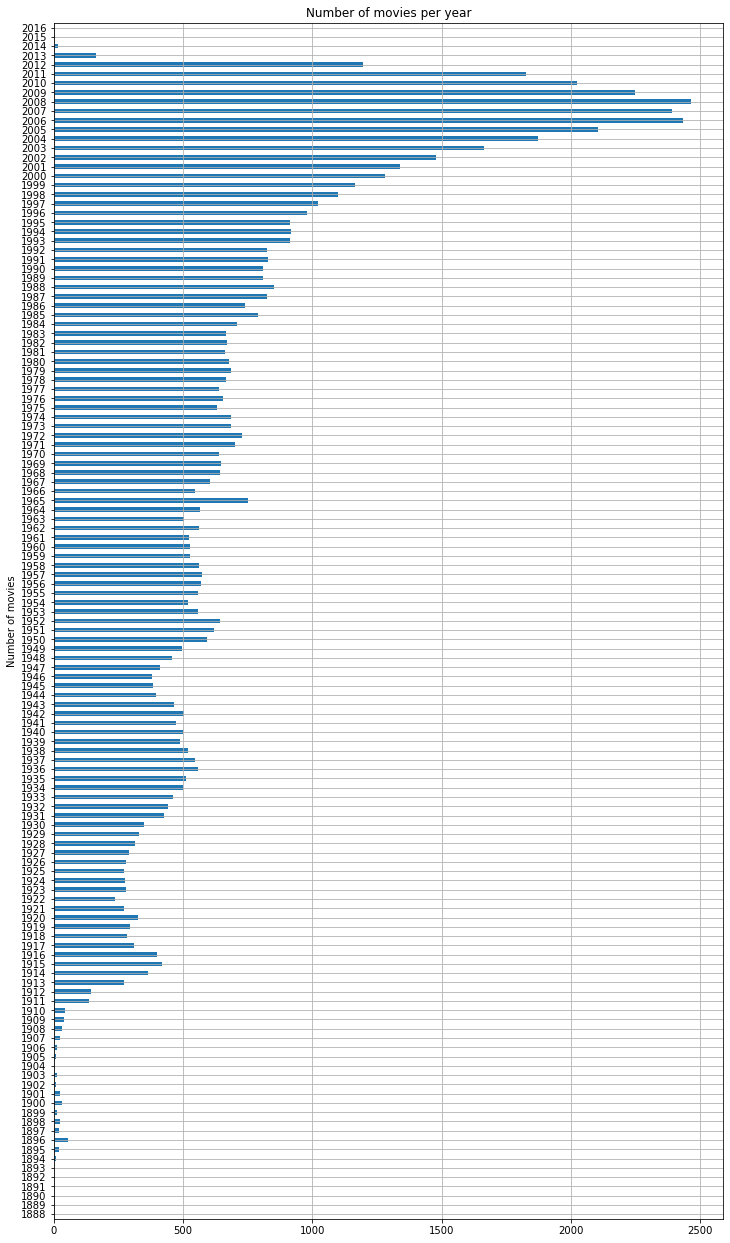

In [10]:
#plotting the number of movies over years
movie_metadata = movie_metadata[movie_metadata.release_date.dt.year.notnull()]

movie_metadata.release_date.dt.year.value_counts()\
                             .sort_index()\
                             .plot(kind='barh',\
                                   figsize=(12,22),\
                                   grid=True,\
                                   title='Number of movies per year',\
                                   xlabel='Number of movies')
                             
plt.show()

## 2.2 Missing values presence

In [11]:
non_NaN_ratio = (movie_metadata.notnull().sum() / len(movie_metadata)) * 100

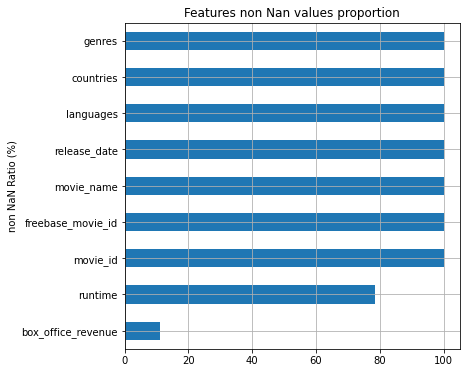

In [12]:

non_NaN_ratio.sort_values().plot(kind='barh',\
                                 figsize=(6,6),\
                                 grid=True,\
                                 title='Features non Nan values proportion',\
                                 xlabel='non NaN Ratio (%)',\
                                 fontsize=10)
plt.show()

## 2.3 Features Simplification from metadata

<p style="text-align: justify;"> In this subpart, we will decompose complex features and repetitive informations into simpler additional features for computational efficiency.  </p>

### 2.3.1 Tvtropes_clusters dataset

In [13]:
# Conversion of the dict feature into several columns
clust = tvtropes_clusters.attr.apply(lambda x: pd.Series(ast.literal_eval(x)))
tvtropes_clusters = pd.concat([tvtropes_clusters, clust], axis=1).drop('attr', axis = 1)

# Renaming of the columns
tvtropes_columns = ['char_trope', 
                    'char_name', 
                    'movie_name', 
                    'freebase_char_actor_map_id', 
                    'actor_name']

tvtropes_clusters.columns = tvtropes_columns
tvtropes_clusters.head(5)

,char_trope,char_name,movie_name,freebase_char_actor_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [14]:
# Identification of several tropes for one given role
tvtropes_clusters['names'] = tvtropes_clusters.char_name + tvtropes_clusters.movie_name + tvtropes_clusters.actor_name
tvtropes_clusters['names'].is_unique

False

### 2.3.2 Movie_metadata dataset

In [15]:
#compare the strings by the 4 first character to perform matching 
def compare(s1,s2):
    return s1[:4]==s2[:4]
#return the string that doesn't contains the substring language
def lang_without_pref(s1,s2):
    return s1 if 'language' not in s1 else s2
#return the string that contains the substring language
def lang_with_pref(s1,s2):
     return s1 if 'language' in s1 else s2

In [16]:
#perform filtering and cleaning the languages and also create a dictionary for matching the anomalies with the right one 
def filter_languages(languages):
    
    Dic = {}
    ENGLISH="english language"
    lower_languages=list(map(lambda x: x.lower(), languages))
    
    #basically every english dialect is consider as just English and not as i.e 'australian aboriginal pidgin english',
    filtered_languages =[ENGLISH if 'english' in language else language for language in lower_languages ]
    Dic["english"] = ENGLISH

    # remove the standard prefix
    filtered_languages= [language.removeprefix('standard ') for language in filtered_languages]
    filtered_languages= [language.replace('\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32','english language') for language in filtered_languages]
    
    #replace manually some of the anomalies
    Dic["\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"] = ENGLISH
    filtered_languages= [language.replace('france','french language') for language in filtered_languages]#??????????????
    Dic["france"] = "french language"
    filtered_languages= [language.replace('m\\u0101ori','maori language') for language in filtered_languages]
    Dic["m\\u0101ori"] = "maori language"
    filtered_languages= [language.replace('deutsch','german') for language in filtered_languages]
    Dic["deutsch"] = "german language"
    filtered_languages= [language.replace('cat\\u00e1n','cata') for language in filtered_languages]#??????????????
    Dic["cat\\u00e1n"] = "cata language"


    #match languages mentioned such as japan, german or chines with the correct one japanese language,chinese language
    for tuples in list(combinations(filtered_languages, 2)):
        if(tuples[0] != tuples[1] and compare(tuples[0],tuples[1])):
            filtered_languages[filtered_languages.index(lang_without_pref(tuples[0],tuples[1]))]=lang_with_pref(tuples[0],tuples[1])
            Dic[lang_without_pref(tuples[0],tuples[1])]=lang_with_pref(tuples[0],tuples[1])
            
    filtered_languages=[language for language in filtered_languages  if len(language)>0 ]    
    #add the suffix language to the languages that doesn't have one
    filtered_languages=[language+" language" if 'language' not in language and len(language)>0 else language for language in filtered_languages ]
    
    return filtered_languages,Dic

In [17]:
common_countries_words=['ssr','kingdom','united','republic','of','south','union','and','democratic']

#merge the same countries the have changed their names over time
def contries_dict(countries):
    
    dictionary={}
    countries=list(map(lambda x: x.lower(), countries))
    #manually replacment of anomalies
    countries= [country.replace('malayalam language','india') for country in countries]
    dictionary["malayalam language"] = "india"
    countries= [country.replace('german language','germany') for country in countries]
    dictionary["german language"] = "germany"
    countries= [country.replace('ukranian ssr','ukrainian ssr') for country in countries]    
    dictionary["ukranian ssr"] = "ukrainian ssr"


    #check matches between the country names , if there is a match add the relationship to the dictionary
    for tuples in list(combinations(countries, 2)):
        for string1 in list(tuples[0].split(" ")):
            if(string1 in list(tuples[1].split(" ")) and string1 not in common_countries_words and len(tuples[0])>len(tuples[1])):
                dictionary[tuples[0]]=tuples[1]
                break
            elif(string1 in list(tuples[1].split(" ")) and string1 not in common_countries_words and len(tuples[0])<len(tuples[1])):
                dictionary[tuples[1]]=tuples[0]
                break
    return dictionary

In [18]:
# Search for unique values on different features
def unique_features(features):
    features_search = []
    for ind,feature in features.iteritems():
        if len(feature)==0:
            continue
        sub_feature = [x for x in feature if x not in features_search]
        features_search += sub_feature
        
    #remove duplicates
    features_search = list(dict.fromkeys(features_search))            
    return features_search

In [19]:
#performing correction over languages using the given correction dictionary based on matching 
def replace_anomalies(languages,dictionary):
    languages=[x.lower() for x in languages]
    languages= [language.removeprefix('standard ') for language in languages]
                
    for language in languages:
        if(('language' not in language) and (language in dictionary)): language=dictionary.get(language)
        else: language+=" language"
    
    languages= [language+" language" if 'language' not in language and language !='' else language for language in languages]
    languages = list(dict.fromkeys(languages))

    return languages 

In [20]:
#make changes in the country names(merge countries) depends on the countries dictionary
def merge_countries(countries,dictionary):
    countries=[x.lower() for x in countries]
    countries=[dictionary.get(country) if country in dictionary else country for country in countries]
    return countries 

In [21]:
# Erase the useless characters of dict features and convert into lists
def extract_values(s):
    s = s.split(',')
    for i in range(len(s)):
        s[i] = s[i][s[i].find('": "')+len('": "'):]
        s[i] = s[i][:s[i].find('"')]
    s.sort()
    return list(','.join(s).split(","))

# Simplify the displaying of languages, countries and genres
movie_metadata.languages = movie_metadata.languages.apply(extract_values)
unq_languages=unique_features( movie_metadata.languages)#finding the unique languages
flt_languages,language_dictionary=filter_languages(unq_languages) #unique filtered languages (215)

#remove the lanugages anomalies by performing matching using the dictionary
movie_metadata.languages = movie_metadata.languages.apply(lambda x : replace_anomalies(x,language_dictionary))
movie_metadata.languages = movie_metadata.languages.apply(lambda x : list(','.join(x).split(",")))


movie_metadata.countries = movie_metadata.countries.apply(extract_values)
unq_countries=unique_features( movie_metadata.countries)#findind the unique countries
country_dictionary=contries_dict(unq_countries)
#remove the countries anomalies by performing matching using the dictionary
movie_metadata.countries = movie_metadata.countries.apply(lambda x : merge_countries(x,country_dictionary))
movie_metadata.countries = movie_metadata.countries.apply(lambda x : list(','.join(x).split(",")))

movie_metadata.genres = movie_metadata.genres.apply(extract_values)

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama]


In [22]:
# Transform a feature of lists into several features
def extent_list_feature(df, f_name):
    
    # Generate the names of the new extented columns like 'f_name_1' 
    column_names = []
    for i in range(1, df[f_name].str.len().max()+1):
        column_names = np.append(column_names, f_name + '_' + str(i))
        
    # Extent the list column into several columns
    extended_columns = pd.DataFrame(df[f_name].to_list(), columns=column_names)
    
    # Add the new extended columns to the initial dataframe
    df = pd.concat([df, extended_columns], axis=1).drop(f_name, axis = 1)
        
    return df


movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama]


In [23]:
def find_feature_presence(df,feature):
    # Search for unique features
    unique_feature = []

    for index,feature_list in feature.iteritems():
        sub_feature= [x for x in feature_list if x not in unique_feature]   
        unique_feature += sub_feature
    unique_feature=[x for x in unique_feature if len(x)>0] 
    
    #find feature presence in the entire set of feature values
    unique_feat_ind = []

    for lang in unique_feature:
        unique_feat_ind.append(pd.DataFrame({lang: feature.apply(lambda x: lang in x).values}))
    unique_feat_ind = pd.concat(unique_feat_ind, axis = 1)
    unique_feat_ind = unique_feat_ind.set_index(df.index)
    presence=unique_feat_ind.sum(axis=0)/df.shape[0]
    
    return presence

In [24]:
language_presence=find_feature_presence(movie_metadata,movie_metadata.languages)
genre_presence=find_feature_presence(movie_metadata,movie_metadata.genres)

In [25]:
genre_presence

Action                             0.110572
Adventure                          0.063230
Horror                             0.066570
Science Fiction                    0.038590
Space western                      0.000174
                                     ...   
New Queer Cinema                   0.000013
Neorealism                         0.000013
The Netherlands in World War II    0.000027
Revisionist Fairy Tale             0.000027
Homoeroticism                      0.000013
Length: 363, dtype: float64

In [26]:
language_presence

english language        0.530199
norwegian language      0.002699
german language         0.029250
silent film language    0.041142
spanish language        0.047195
                          ...   
chewa language          0.000013
haryanvi language       0.000027
assyrian language       0.000013
papiamento language     0.000013
kuna language           0.000013
Length: 209, dtype: float64

In [27]:
#finds the most representative features filtered by a given quartiles 
def representative_features(languages_presence,quartiles):
    language_presence_filtered = languages_presence[languages_presence >= languages_presence.quantile(quartiles)]
    return language_presence_filtered

In [28]:
# Filter both languages and genre representation
repre_languages=representative_features(language_presence,0.95)
repre_genres=representative_features(genre_presence,0.95)

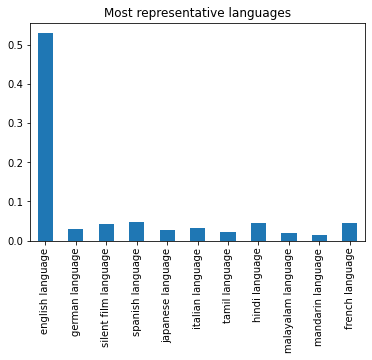

In [29]:
plt.title("Most representative languages")
repre_languages.plot.bar()
plt.show()

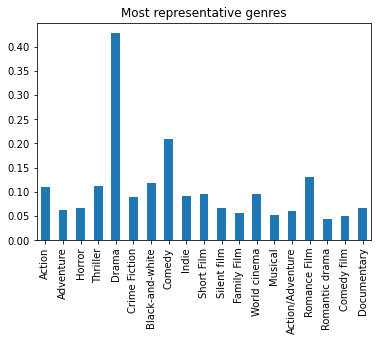

In [30]:
plt.title("Most representative genres")
repre_genres.plot.bar()
plt.show()

In [31]:
#Most representative feature indicators
def representative_feature_indicator(df,feature,representative_features):    
    feature_indicator = []

    #create the indicators based on representative features 
    for lang in representative_features.index:
        feature_indicator.append(pd.DataFrame({lang: feature.apply(lambda x: lang in x).values}))

    feature_indicator = pd.concat(feature_indicator, axis = 1)
    feature_indicator = feature_indicator.set_index(df.index)
    return feature_indicator

In [32]:
#representative languages indicators for each movie
language_indicator=representative_feature_indicator(movie_metadata,movie_metadata.languages,repre_languages)
genre_indicator=representative_feature_indicator(movie_metadata,movie_metadata.genres,repre_genres)

#merge the feature indicators 
movie_metadata = pd.merge(movie_metadata, language_indicator, left_index = True, right_index = True)
movie_metadata = pd.merge(movie_metadata, genre_indicator, left_index = True, right_index = True)

movie_metadata.head()

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Short Film,Silent film,Family Film,World cinema,Musical,Action/Adventure,Romance Film,Romantic drama,Comedy film,Documentary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,False,False,False,False,False,False
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]",True,...,False,False,False,False,False,False,False,False,False,False
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,False,False,False,False,False,False
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
movie_metadata.columns

Index(['movie_id', 'freebase_movie_id', 'movie_name', 'release_date',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres',
       'english language', 'german language', 'silent film language',
       'spanish language', 'japanese language', 'italian language',
       'tamil language', 'hindi language', 'malayalam language',
       'mandarin language', 'french language', 'Action', 'Adventure', 'Horror',
       'Thriller', 'Drama', 'Crime Fiction', 'Black-and-white', 'Comedy',
       'Indie', 'Short Film', 'Silent film', 'Family Film', 'World cinema',
       'Musical', 'Action/Adventure', 'Romance Film', 'Romantic drama',
       'Comedy film', 'Documentary'],
      dtype='object')

# 3 Data Merging



## 3.1 Data relative to the movies only

In [34]:
# We prevent plot summaries without any other metadata
movie_data = movie_metadata.merge(plot_summaries, how='left')
movie_data.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Silent film,Family Film,World cinema,Musical,Action/Adventure,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,False,False,False,False,False,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]",True,...,False,False,False,False,False,False,False,False,False,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",False,...,False,False,False,False,False,False,False,False,False,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,False,False,False,False,False,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,False,False,False,False,False,"Eva, an upper class housewife, becomes frustra..."


## 3.2 Data relative to the characters

In [35]:
def merge_uncomplete_features(main_df, df, merging_feature, how_='left'):
    """ Enrich the NaN values of main_df features, if possible, by merging with df.
    
    Args:
        main_df (pd.DataFrame): dataframe whose NaN values will be replaced if possible on some common features
        df (pd.DataFrame): dataframe that complete NaN values of main_df
        merging_feature (pd.Series): common feature between main_df and df that will permit the merge between the two
        how_  (str): how argument of the merge
        
    Return:
        df_merge (pd.DataFrame): updated version of main_df
    """
    
    # Merge on the merging feature + extent common features in 2 columns such as 'movie_name' and 'movie_name_copy'
    df_merge = pd.merge(main_df, df.set_index(merging_feature), how=how_, right_index=True, left_on=merging_feature, suffixes=['', '_copy'])
    
    # Common features between main_df and df
    common_features = np.array(main_df.columns.intersection(df.set_index(merging_feature).columns))
    
    # Invert the Nan value of the initial main_df feature with its version in df, then drop the copied feature
    for ind, feature in enumerate(common_features):
        df_merge.loc[df_merge[feature].isnull(), [feature, feature + '_copy']] = df_merge.loc[df_merge[feature].isnull(), [feature + '_copy', feature]].values
        df_merge = df_merge.drop(feature + '_copy', axis=1)
    
    return df_merge

In [36]:
# Enrich the NaN values within the char_name feature of char_metadata with names_clusters if possible. 
char_data = merge_uncomplete_features(char_metadata, name_clusters, 'freebase_char_actor_map_id')
char_data = char_data[~char_data.index.duplicated()]
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [37]:
# Enrich the NaN values within numerous features of char_metadata with tvtropes_clusters if possible + add char_tropes features
char_data = merge_uncomplete_features(char_data, tvtropes_clusters, 'freebase_char_actor_map_id')
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id,char_trope,movie_name,names
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN,NaN,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN,NaN,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN,NaN,NaN


## 3.3 Feature extraction from characters dataset to movies

### 3.3.1 Gender presence

In [38]:
gender_presence = char_data.groupby('movie_id')['actor_gender'].value_counts(normalize = True).unstack()
gender_presence.columns = [f"{x}_gender_porportion" for x in gender_presence.columns.tolist()]
gender_presence.fillna(0, inplace = True)
gender_presence.head()

,F_gender_porportion,M_gender_porportion
movie_id,,
330,1.000000,0.000000
3217,0.230769,0.769231
3333,0.428571,0.571429
3746,0.200000,0.800000
3837,0.100000,0.900000


In [39]:
movie_data = pd.merge(movie_data, gender_presence, left_on = 'movie_id', right_on = 'movie_id')
movie_data.head()[gender_presence.columns]

,F_gender_porportion,M_gender_porportion
0,0.352941,0.647059
1,0.266667,0.733333
2,0.500000,0.500000
3,0.500000,0.500000
4,0.333333,0.666667


### 3.3.2 Mean character age

In [40]:
mean_actor_age_at_release = char_metadata.groupby('movie_id')['actor_age_at_movie_release'].mean()

In [41]:
movie_data = pd.merge(movie_data, mean_actor_age_at_release, left_on = 'movie_id', right_on = 'movie_id')

In [42]:
movie_data.head()[['movie_id','actor_age_at_movie_release']]

,movie_id,actor_age_at_movie_release
0,975900,43.461538
1,3196793,42.444444
2,28463795,32.750000
3,9363483,29.000000
4,261236,33.000000


# 4 Other feature extraction

## 4.1 Plot summary lexical feature extraction

Following, we merge the results of the lexical feature engineering pipeline we performed on summaries. The results were exported to the plot_lexicon.csv that is loaded in the following cell. As the processing time is expensive, the code is located in the lexicon.ipynb notebook in the github.

In [43]:
lexical_data = pd.read_csv(DATA_PATHWAY + 'plot_lexicon.csv', sep=',').drop(labels=['plot_summary'], axis=1)
movie_data = pd.merge(movie_data, lexical_data, left_on='movie_id', right_on='movie_id')
movie_data['pn'] = movie_data['positive_count']/(movie_data['positive_count'] + movie_data['negative_count'])

movie_data.head()

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Romantic drama,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion,actor_age_at_movie_release,positive_count,negative_count,pn
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,"Set in the second half of the 22nd century, th...",0.352941,0.647059,43.461538,13,39,0.250000
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,A series of murders of rich young women throug...,0.500000,0.500000,29.000000,18,60,0.230769
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,"Eva, an upper class housewife, becomes frustra...",0.333333,0.666667,33.000000,19,43,0.306452
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01,NaN,86.0,[english language],[south africa],"[Adventure, Family Film, Fantasy, World cinema]",True,...,False,False,False,"Every hundred years, the evil Morgana returns...",0.200000,0.800000,33.250000,7,11,0.388889
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[english language],[united states of america],"[Comedy, Comedy-drama, Drama, Ensemble Film, R...",True,...,True,False,False,"Adam, a San Francisco-based artist who works a...",0.666667,0.333333,35.166667,9,20,0.310345


In [44]:
movie_data.shape[0]

35734

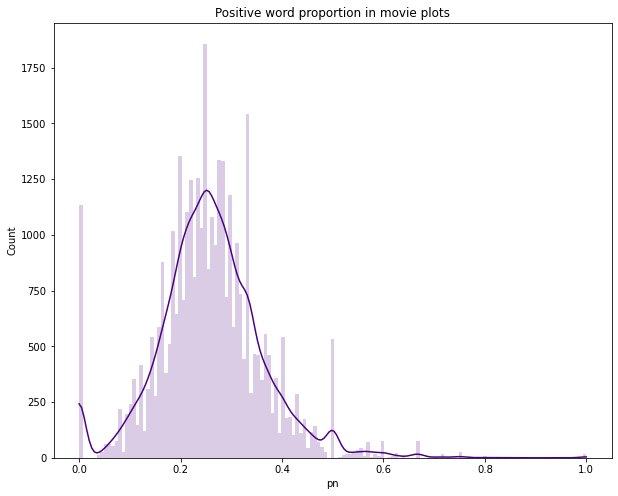

In [45]:
plt.figure(figsize = (10,8))
sns.histplot(movie_data['pn'], kde=True, alpha=0.2,linewidth=0, color = 'indigo')
plt.title("Positive word proportion in movie plots")
plt.show()

##  4.2 IMDb Score extraction

 We "standarize" text titles to be lowercase and strip any stray whitespaces. We attempt to match as many titles as possible with the akas (also known as) IMDb movie database.

In [46]:
movie_data.movie_name = movie_data.movie_name.apply(lambda x: x.lower().strip())

The following code is commented due to that it cannot be run from a cloned version of the repository directly as the IMDb datasets are past the GitHub 100 MB limit. To be able to reproduce this section of code refer to the README, to obtain the data and folder structure needed to do so.

``` python
# Set movie name as index
movie_data = movie_data.set_index('movie_name')

# Load IMDb datasets
akas = pd.read_csv('./data/imdb/title_akas.tsv', sep = "\t").dropna()
ratings = pd.read_csv('./data/imdb/title_ratings.tsv', sep = "\t")

# Set akas titles to lowercase and strip any stray whitespace
akas.title = akas.title.apply(lambda x: x.lower().strip())

akas.drop_duplicates(subset = 'title', inplace = True)

# Take only features used for future merge
akas = akas[["titleId", "title"]].set_index('title')

# Merge and drop dup
movie_data = pd.merge(movie_data, akas, left_index= True, right_index = True)

# Merge scores based on merged IMDb indexes
movie_data = pd.merge(movie_data, ratings, left_on = 'titleId', right_on = 'tconst')

# Drop unused indexes
movie_data.drop(['titleId', 'tconst'], axis = 1, inplace = True)
```

The result is saved in the following imported dataset.

In [47]:
movie_data = pd.read_csv('./data/movie_data_imdbscores.csv')
movie_data.head()

,movie_id,freebase_movie_id,release_date,box_office_revenue,runtime,languages,countries,genres,english language,german language,...,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion,actor_age_at_movie_release,averageRating,numVotes
0,30332673,/m/0crs0hx,2010-01-01,NaN,90.0,[''],['united states of america'],"['Comedy', 'Comedy film', 'Sex comedy', 'Sport...",False,False,...,False,False,True,False,Two horny college guys get summer jobs at a ch...,0.666667,0.333333,38.333333,3.7,3222
1,4213160,/m/0bq8q8,1971-12-17,NaN,119.0,['english language'],['united states of america'],"['Action', 'Action/Adventure', 'Comedy', 'Crim...",True,False,...,False,False,False,False,"Set in Hamburg, West Germany, several criminal...",0.250000,0.750000,41.625000,6.3,2631
2,20624798,/m/05222ld,2008-01-01,NaN,78.0,['english language'],"['australia', 'israel']","['Animation', 'Drama', 'Indie', 'Stop motion',...",True,False,...,False,False,False,False,The film mainly focuses on 28-year-old Dave Pe...,0.111111,0.888889,41.250000,7.2,22
3,2250713,/m/06z7m4,1988-01-01,NaN,98.0,['english language'],"['hungary', 'united states of america']","['Coming of age', 'Drama', 'Family Drama', 'Pe...",True,False,...,False,False,False,False,The father escaped the Soviet invasion of Buda...,0.000000,1.000000,42.000000,5.9,82
4,25969588,/m/02pmmn1,2007-01-01,NaN,NaN,['english language'],['united states of america'],"['Comedy', 'Drama', 'Indie']",True,False,...,False,False,False,False,NaN,0.200000,0.800000,42.000000,6.4,346


The final dataset features is as follows:

In [48]:
movie_data.columns

Index(['movie_id', 'freebase_movie_id', 'release_date', 'box_office_revenue',
       'runtime', 'languages', 'countries', 'genres', 'english language',
       'german language', 'silent film language', 'spanish language',
       'japanese language', 'italian language', 'tamil language',
       'hindi language', 'malayalam language', 'mandarin language',
       'french language', 'Action', 'Adventure', 'Horror', 'Thriller', 'Drama',
       'Crime Fiction', 'Black-and-white', 'Comedy', 'Indie', 'Short Film',
       'Silent film', 'Family Film', 'World cinema', 'Musical',
       'Action/Adventure', 'Romance Film', 'Romantic drama', 'Comedy film',
       'Documentary', 'plot_summary', 'F_gender_porportion',
       'M_gender_porportion', 'actor_age_at_movie_release', 'averageRating',
       'numVotes'],
      dtype='object')

We proceed to drop unused variables for the further analyzes, such as features already processed for feature extraction, features with high missing values density (such as box office revenue) and repetitive features such as gender proportion (we only keep one).

In [49]:
movie_data = movie_data.drop(["freebase_movie_id", "languages", "genres", "box_office_revenue"], axis = 1)

In [50]:
movie_data.head()

,movie_id,release_date,runtime,countries,english language,german language,silent film language,spanish language,japanese language,italian language,...,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion,actor_age_at_movie_release,averageRating,numVotes
0,30332673,2010-01-01,90.0,['united states of america'],False,False,False,False,False,False,...,False,False,True,False,Two horny college guys get summer jobs at a ch...,0.666667,0.333333,38.333333,3.7,3222
1,4213160,1971-12-17,119.0,['united states of america'],True,False,False,False,False,False,...,False,False,False,False,"Set in Hamburg, West Germany, several criminal...",0.250000,0.750000,41.625000,6.3,2631
2,20624798,2008-01-01,78.0,"['australia', 'israel']",True,False,False,False,False,False,...,False,False,False,False,The film mainly focuses on 28-year-old Dave Pe...,0.111111,0.888889,41.250000,7.2,22
3,2250713,1988-01-01,98.0,"['hungary', 'united states of america']",True,False,False,False,False,False,...,False,False,False,False,The father escaped the Soviet invasion of Buda...,0.000000,1.000000,42.000000,5.9,82
4,25969588,2007-01-01,NaN,['united states of america'],True,False,False,False,False,False,...,False,False,False,False,NaN,0.200000,0.800000,42.000000,6.4,346


In [51]:
movie_data.columns

Index(['movie_id', 'release_date', 'runtime', 'countries', 'english language',
       'german language', 'silent film language', 'spanish language',
       'japanese language', 'italian language', 'tamil language',
       'hindi language', 'malayalam language', 'mandarin language',
       'french language', 'Action', 'Adventure', 'Horror', 'Thriller', 'Drama',
       'Crime Fiction', 'Black-and-white', 'Comedy', 'Indie', 'Short Film',
       'Silent film', 'Family Film', 'World cinema', 'Musical',
       'Action/Adventure', 'Romance Film', 'Romantic drama', 'Comedy film',
       'Documentary', 'plot_summary', 'F_gender_porportion',
       'M_gender_porportion', 'actor_age_at_movie_release', 'averageRating',
       'numVotes'],
      dtype='object')

In [52]:
movie_data.plot_summary[0]

"Two horny college guys get summer jobs at a cheerleader camp for the summer. Friendly and naive Michael is mistaken as a homosexual even though he isn't. World class jerk Andy has an addiction to masturbation and also tries to hook up with a different girl every night. Michael and Andy help out head cheerleader Sophie form her own cheerleading team. A group of strippers end up becoming cheerleaders after Michael and Andy have a run-in with them at a local gentlemen's club. A college scholarship is offered to the group of cheerleaders that wins the climatic team competition."

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy
import string 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import matplotlib.pyplot as plt
%matplotlib inline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [54]:
sp = spacy.load('en_core_web_sm')
spacy_stopwords = sp.Defaults.stop_words
stopwords_dict = Counter(spacy_stopwords)

In [55]:

lemmatizer =WordNetLemmatizer()
#cleaning "pipeline"  
def clean_summary(text, stopwords, lemmatization):

      
      #perform casefolding
      text =text.casefold()

      #remove punctuations for each twitter
      text = ' '.join(text_ for text_ in text.split() if text_ not in string.punctuation)

      #remove multiply commas and dots everywhere in tweets      
      text = re.sub('\.|,*','', text)
      
      if stopwords:
          #remove the stopwords
          text = ' '.join([word for word in text.split() if word not in stopwords_dict])         
            
      if lemmatization :
          #perform lemmatization
          text = ' '.join(lemmatizer.lemmatize(text_)  for text_ in text.split() )

      #remove the tokens length less than 2 again if some may appear after the above preprocessing
      text = ' '.join(text_ for text_ in text.split() if len(text_)>2)
      
      return  text


<>:13: DeprecationWarning: invalid escape sequence \.
<>:13: DeprecationWarning: invalid escape sequence \.
C:\Users\User\AppData\Local\Temp\ipykernel_4172\708893003.py:13: DeprecationWarning: invalid escape sequence \.
  text = re.sub('\.|,*','', text)


In [56]:
#there are 18494 nan plot summaries
movie_data.plot_summary.isna().sum()

18494

In [57]:
movie_topics = movie_data[pd.notnull(movie_data['plot_summary'])]

In [58]:
len(movie_topics.plot_summary) # after we drop the movies that doesn't have summaries

31291

In [59]:
movie_topics.plot_summary=movie_topics.plot_summary.apply(lambda x : clean_summary(x,stopwords=True, lemmatization=True))

C:\Users\User\AppData\Local\Temp\ipykernel_4172\2512033726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_topics.plot_summary=movie_topics.plot_summary.apply(lambda x : clean_summary(x,stopwords=True, lemmatization=True))


In [60]:
movie_topics.plot_summary=movie_topics.plot_summary.apply(lambda x : gensim.utils.simple_preprocess(str(x), deacc=True))


C:\Users\User\AppData\Local\Temp\ipykernel_4172\2042264280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_topics.plot_summary=movie_topics.plot_summary.apply(lambda x : gensim.utils.simple_preprocess(str(x), deacc=True))


In [61]:
summaries_corpus=movie_topics.plot_summary.values.tolist()

In [62]:
#
#count_vectors = CountVectorizer()
#x_counts = count_vectors.fit_transform(list(summaries_corpus))
#x_counts.todense()
#len(count_vectors.get_feature_names())
#tfidf_transformer = TfidfTransformer()
#x_tfidf = tfidf_transformer.fit_transform(x_counts)
#dimension = 5
#lda = LDA(n_components = dimension)
#lda_array = lda.fit_transform(x_tfidf)


In [63]:
summaries_corpus[:1]

[['horny',
  'college',
  'guy',
  'summer',
  'job',
  'cheerleader',
  'camp',
  'summer',
  'friendly',
  'naive',
  'michael',
  'mistaken',
  'homosexual',
  'isn',
  'world',
  'class',
  'jerk',
  'andy',
  'addiction',
  'masturbation',
  'try',
  'hook',
  'different',
  'girl',
  'night',
  'michael',
  'andy',
  'help',
  'head',
  'cheerleader',
  'sophie',
  'form',
  'cheerleading',
  'team',
  'group',
  'stripper',
  'end',
  'cheerleader',
  'michael',
  'andy',
  'run',
  'in',
  'local',
  'gentlemen',
  'club',
  'college',
  'scholarship',
  'offered',
  'group',
  'cheerleader',
  'win',
  'climatic',
  'team',
  'competition']]

In [64]:
#enrich our tokens by creating bigrams for each summary

def make_bigrams(summaries): 
    bigram = gensim.models.Phrases(summaries_corpus, min_count=5, threshold=100) # default parameters 
    bigram_model=gensim.models.phrases.Phraser(bigram) #create the model
    return [bigram_model[summary] for summary in summaries] # return the output of the bigram model for each summary

#for trigrams 
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
#trigram_model=gensim.models.phrases.Phraser(trigram) #create the model
#return [trigram_mod[bigram_model[summary]] for summary in summaries]


summaries_corpus=make_bigrams(summaries_corpus)

In [65]:
summaries_corpus[110]

['introductory',
 'storyline',
 'involves',
 'hitman',
 'lee',
 'wood',
 'dosmo',
 'pizzo',
 'kill',
 'roy',
 'foxx',
 'lie',
 'bed',
 'inject',
 'roy',
 'ex',
 'wife',
 'becky',
 'tranquilizer',
 'day',
 'afterward',
 'wood',
 'turn',
 'pizzo',
 'shooting',
 'blowing',
 'car',
 'order',
 'set',
 'fall',
 'guy',
 'wood',
 'flees',
 'scene',
 'norwegian',
 'girlfriend',
 'helga',
 'dosmo',
 'survives',
 'seeking',
 'shelter',
 'house',
 'allan',
 'hopper',
 'abrasive',
 'art_dealer',
 'suffers',
 'kidney',
 'stone',
 'take',
 'hopper',
 'abused',
 'assistant',
 'susan',
 'parish',
 'hostage',
 'completely',
 'unaware',
 'fact',
 'hopper',
 'called',
 'older',
 'sister',
 'audrey',
 'house',
 'medical',
 'help',
 'way',
 'brother',
 'house',
 'audrey',
 'nurse',
 'pick',
 'teddy',
 'pepper',
 'producer',
 'contemplating_suicide',
 'becky',
 'awakens',
 'horror',
 'discovers',
 'roy',
 'body',
 'bed',
 'run',
 'house',
 'flag',
 'vice',
 'detective',
 'happen',
 'driving',
 'initially',
 

In [66]:
#create the dictionary( a mapping between words and their integer ids) and corpus for LDA analaysis based on the preprocesseed summaries
dictionary = corpora.Dictionary(summaries_corpus)

#so for each word we have already mapped it in tuple of word id and frequency , so a summary is a bag of these tuples
corpus = [dictionary.doc2bow(summary) for summary in summaries_corpus]

In [105]:
len(summaries_corpus)

31291

In [67]:
len(dictionary)

120627

In [104]:
print(corpus[1])


[(6, 1), (18, 1), (31, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 5), (50, 1), (51, 2), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 1), (62, 5), (63, 3), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 10), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 2), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 2), (120, 1), (121, 1), (122, 1), (123, 2), (124, 1), (125, 1), (126, 1), (127, 3), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), 

In [69]:
[[(dictionary[word_id],frequence) for word_id, frequence in cp] for cp in corpus[:1]]

[[('addiction', 1),
  ('andy', 3),
  ('camp', 1),
  ('cheerleader', 4),
  ('cheerleading', 1),
  ('class', 1),
  ('climatic', 1),
  ('college', 2),
  ('competition', 1),
  ('different', 1),
  ('end', 1),
  ('form', 1),
  ('friendly', 1),
  ('gentlemen_club', 1),
  ('girl', 1),
  ('group', 2),
  ('guy', 1),
  ('head', 1),
  ('help', 1),
  ('homosexual', 1),
  ('hook', 1),
  ('horny', 1),
  ('in', 1),
  ('isn', 1),
  ('jerk', 1),
  ('job', 1),
  ('local', 1),
  ('masturbation', 1),
  ('michael', 3),
  ('mistaken', 1),
  ('naive', 1),
  ('night', 1),
  ('offered', 1),
  ('run', 1),
  ('scholarship', 1),
  ('sophie', 1),
  ('stripper', 1),
  ('summer', 2),
  ('team', 2),
  ('try', 1),
  ('win', 1),
  ('world', 1)]]

In [78]:
#LDA implementation using the previous corpus 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,# how often the model parameters should be updated
                                           chunksize=100, # number of summaries to be used in each training chunk
                                           passes=10, # training passes
                                           alpha='auto', # hyperparameter
                                           per_word_topics=True)
#so the LDA find the maximum likelihood distribution of words and summaries over topics(set to 10) 

In [79]:
lda_model.print_topics()

[(0,
  '0.007*"life" + 0.007*"father" + 0.007*"love" + 0.006*"film" + 0.006*"family" + 0.006*"mother" + 0.006*"friend" + 0.006*"find" + 0.005*"home" + 0.005*"tell"'),
 (1,
  '0.006*"men" + 0.005*"kill" + 0.004*"soldier" + 0.004*"order" + 0.004*"army" + 0.004*"killed" + 0.004*"war" + 0.004*"police" + 0.004*"village" + 0.004*"escape"'),
 (2,
  '0.007*"tom" + 0.007*"jack" + 0.006*"money" + 0.006*"car" + 0.006*"joe" + 0.006*"frank" + 0.005*"chris" + 0.005*"police" + 0.005*"town" + 0.005*"jim"'),
 (3,
  '0.010*"find" + 0.006*"kill" + 0.005*"escape" + 0.005*"tell" + 0.004*"body" + 0.004*"try" + 0.004*"man" + 0.004*"house" + 0.004*"car" + 0.004*"begin"')]

In [80]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=summaries_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.304194553748708

Coherence Score:  0.3681100788222885


In [81]:
#interactive plot of topic representation 
#in the left each circle represent a topic and it's size determine the importance.Also in the right are the most representative words for each topic  
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.103395  0.172215       1        1  44.898499
3     -0.126402  0.060031       2        1  25.328153
1     -0.097192 -0.238899       3        1  19.982444
2      0.326989  0.006653       4        1   9.790904, topic_info=        Term          Freq         Total Category  logprob  loglift
633     love  15496.000000  15496.000000  Default  30.0000  30.0000
171    money   8982.000000   8982.000000  Default  29.0000  29.0000
376   mother  13135.000000  13135.000000  Default  28.0000  28.0000
63       car   9961.000000   9961.000000  Default  27.0000  27.0000
151     kill  12471.000000  12471.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
412     gang   2074.176772   4013.287925   Topic4  -5.5001   1.6637
38      team   1949.213006   4053.936334   Topic4  -5.5622   1.5915
1699    town   2301.752467   8098.365169   Topic4  -5.3960   1.0657
185   police   2451.132653  11240.577771   Topic4  -5.3331   0.8007
344      men   1598.713309   9904.598918   Topic4  -5.7604   0.4999

[276 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
5066       1  0.999596  affair
3870       2  0.041796   agent
3870       3  0.815015   agent
3870       4  0.143245   agent
5698       1  0.143675    alex
...      ...       ...     ...
1174       1  0.896359   young
1174       3  0.103601   young
6365       2  0.999674  zombie
12920      1  0.000853   zorro
12920      3  0.999008   zorro

[417 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [82]:
pyLDAvis.save_html(vis, 'lda.html')


In [100]:
#term to topics matrix
"""
topics_terms = lda_model.state.get_lambda() 
topics_terms_proba = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)
words = [lda_model.id2word[i] for i in range(topics_terms_proba.shape[1])]
pd.DataFrame(topics_terms_proba,columns=words)
"""

In [86]:
#doc/movies to topics distribution


In [108]:
len(summaries_corpus)

31291

In [112]:
train_vecs = []
for i in range(len(summaries_corpus)):
    top_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(4)]
    train_vecs.append(topic_vec)

In [130]:
movie_topic_distribution = pd.DataFrame(train_vecs[0:], columns=['topic_1','topic_2','topic_3','topic_4'])


In [131]:
movie_topic_distribution

,topic_1,topic_2,topic_3,topic_4
0,0.633802,0.099373,0.236645,0.030179
1,0.165583,0.188212,0.245007,0.401198
2,0.801629,0.024238,0.107932,0.066200
3,0.635486,0.272176,0.073498,0.018840
4,0.378304,0.029091,0.236550,0.356055
...,...,...,...,...
31286,0.846602,0.098987,0.010952,0.043460
31287,0.632357,0.174138,0.080308,0.113197
31288,0.919263,0.058465,0.006877,0.015395
31289,0.729317,0.202222,0.009400,0.059061
